# Comparación entre modelos de Deep Learning y Few-Shot Learning para Interfaz Cerebro-Máquina basada en imágenes motoras.

### Integrantes

    Javier Pérez
    https://github.com/javierperezl?tab=repositories
    Christian Picón
    https://github.com/Cpicon/miProyecto

### Asesores:

    Prof. Mario Valderrama
    Prof. Fernando Lozano
    
    
### Contexto:

Una Interfaz Cerebro-Máquina (Brain-Computer Interface, BCI) es un sistema que traduce los patrones de la actividad cerebral de un usuario en comandos que se pueden emplear para controlar dispositivos o aplicaciones [1].
De forma no invasiva, se registra la actividad cerebral con electroencefalografía (EEG).

![BCIsystem.png](./img/BCI-system.png)[3]


Una BCI basada en imágenes motoras (motor imagery, MI) utiliza la actividad inducida en la corteza motora que un usuario realiza mediante la imaginación del movimiento motor sin producir ningún movimiento de las extremidades ni recibir estímulo externo alguno [2]. Por ejemplo, movimientos de las manos izquierda y derecha.
Para diseñar e implementar un sistema BCI se tienen dos etapas. La etapa de entrenamiento, en la que se enfoca esta investigación buscando hacer esta etapa más corta, corresponde a la calibración del sistema [1]. La segunda etapa es la fase operacional donde el sistema puede reconocer los patrones de la actividad cerebral para traducirlos en comandos para la computadora.

![morotIMg.png](./img/motorImagSystem.jpg)[4]


En la etapa de entrenamiento, se han aplicado varias técnicas de Machine Learning (ML) que han permitido obtener algoritmos de clasificación más robustos, en este caso, entre las distintas clases de MI.

### Categorías de clasificadores [1]: 

+ clasificadores adaptativos

+ clasificadores de matrices y tensores

+ clasificadores basados en aprendizaje por transferencia y aprendizaje profundo (Deep Learning), y otros clasificadores misceláneos .

## Identificación del Problema:

+ conjuntos de datos para entrenar clasificadores más complejos que requieran muchos datos.


## Posibles soluciones:

+ Usar/Diseñar conjuntos de datos más grandes.

+ Few-Shot Learning: entrenar el modelo con pocos datos.

+ Deep Learning con nuevas estrategias de entrenamiento, por ejemplo, aumento de datos.

## Objetivos del proyecto: 

+ Comparar la implementación de algoritmos de Deep Learning en un conjunto de datos considerablemente más grande que los utilizados hasta la fecha

![data.png](./img/DeepLeartoBCI.JPG)[6]

+ utilizar métodos de Few-Shot Learning para igualar la precisión obtenida en el primer enfoque, pero utilizando una menor cantidad de datos en el entrenamiento. 

![MatchingNetoBCI.png](./img/MatchingNetoBCI.JPG)[7]

+ Evaluar los modelos tanto de Deep Learning como de Few-Shot Learning (o una combinación de los dos métodos) en **datos experimentales**. Estos datos serán recolectados con las mismas especificaciones mencionadas en la metodología siguiendo los paradigmas utilizados en los modelos.

## Dataset:


![data.png](./img/Data.jpg)[5]


### Descripción: 

+ Imágenes motoras de EEG para BCI con registros que suman 60 horas. 

+ Participantes: 13 individuos, 8 hombres y 5 mujeres entre 20 y 35 años. 

+ Número de sesiones: 75 sesiones, cada una tuvo una duración de 55 minutos divididas en 3 subsesiones de 15 minutos y tiempo de descanso. 

+ En total, se registraron alrededor de 60,000 ejemplos de imágenes motoras.

+ Los 60,000 ejemplos de imágenes motoras se clasifican según **5 paradigmas de interacción**: 

    + CLA
    + HaLT
    + 5F
    + FreeForm
    + NoMT. 
    

![](./img/GUI.jpg)

+ **CLA**: paradigma clásico que incluye los movimientos de las manos izquierda y derecha, y una imagen mental pasiva donde los participantes no realizan ninguna imagen motora.


+ **HaLT**: extensión de CLA en el que se incluyen las imágenes de los pies izquierdo y derecho, y el movimiento de la lengua. 

+ **5F**: contiene imágenes motoras de los cinco dedos de la mano. 

+ **FreeForm**: los participantes realizaban movimientos voluntarios guiados por la información en pantalla. 

+ **NoMT**: los participantes no realizaban imágenes motoras, sino que observaban pasivamente la pantalla de instrucciones.

      FreeForm y NoMT contienen pocos ejemplos porque no fueron estudiados detalladamente por los desarrolladores del conjunto de datos. El desempeño de un clasificador en 5F fue evaluado, pero no se obtuvieron resultados satisfactorios porque los participantes no realizaron correctamente las imágenes motoras.

En el proyecto, trabajaremos con las imágenes motoras según los paradigmas CLA y HaLT.

![cronograma](./img/cronograma.jpg)


In [1]:
import numpy as np
from scipy.io import loadmat 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import requests as rq
import os, sys

In [2]:
lista = ['Time death','Left hand','Right hand','Passive/neutral','Left leng','Tongue','Right leng'
        ,'Session break','Experiment end', 'Initial relaxation']
Convenction = pd.DataFrame(lista)
Convenction.columns = ['Meaning']
Convenction.index.names = ['Label']
Convenction.rename(index={7:91, 8:92, 9:99}, inplace=True)
Convenction

,Meaning
Label,
0,Time death
1,Left hand
2,Right hand
3,Passive/neutral
4,Left leng
5,Tongue
6,Right leng
91,Session break
92,Experiment end


### Importing data


In [3]:
def read_data(paradigma,name,marker):
    labels = marker.replace('.mat','')
    data = loadmat('../Data/'+paradigma+'_DataMarker/'+name)
    marker = loadmat('../Data/'+paradigma+'_DataMarker/'+marker)
    patient = name.replace('.mat','')
    df_data = pd.DataFrame(data[patient])
    print(pd.DataFrame(marker[labels]).shape)
    df_data['label'] = pd.DataFrame(marker[labels])
    canales = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','A1','A2','F7','F8','T3','T4','T5','T6','Fz','Cz','Pz','X5','label']
    df_data.columns =  canales
    df_data.index = df_data.index/200      
    return df_data

In [4]:
df_data_HaLT = read_data('HaLT','HaLT_A1.mat','HaLT_A1_marker.mat')
df_data_CLA = read_data('CLA','CLA_A1.mat','CLA_A1_marker.mat')

(667600, 1)
(671600, 1)


In [5]:
print('classe on HaLT Paradigm:',list(df_data_HaLT['label'].unique()))
print('classe on CLA Paradigm:',list(df_data_CLA['label'].unique()))

classe on HaLT Paradigm: [0, 99, 1, 4, 6, 5, 3, 2, 91, 92]
classe on CLA Paradigm: [0, 3, 1, 2]


In [6]:
df_data_HaLT.tail()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,label
3337.975,-33.43,-5.28,-19.95,2.04,-2.02,1.55,5.62,4.67,6.53,4.66,...,18.47,-11.02,12.57,2.51,5.18,-7.44,-2.63,1.71,-0.47,0
3337.980,-24.36,-2.61,-12.65,3.06,-4.01,2.34,2.91,5.97,3.68,6.66,...,17.15,-17.13,15.31,-3.32,6.65,-2.66,-2.21,1.67,0.02,0
3337.985,-36.38,-4.69,-19.24,1.17,-4.78,3.62,2.50,8.84,3.67,9.50,...,17.02,-17.80,15.88,-3.58,10.02,-7.16,-3.36,3.79,-0.40,0
3337.990,-28.58,-5.15,-20.03,2.64,-6.35,5.70,2.11,10.51,3.09,10.78,...,18.07,-22.76,15.61,-6.55,9.87,-4.91,-2.78,4.74,-0.09,0
3337.995,-40.94,-9.33,-23.22,2.42,-6.68,5.56,5.58,12.48,7.15,14.38,...,17.50,-18.78,16.09,-3.20,12.94,-7.68,-1.20,8.04,-0.17,0


In [7]:
df_data_CLA.tail()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,label
3357.975,39.82,-28.17,5.24,-0.17,7.32,-6.65,-2.20,-9.72,80.33,8.84,...,56.82,-1.23,-23.08,25.15,-8.05,9.89,-8.11,-4.64,-0.11,0
3357.980,33.54,-28.51,3.75,-1.49,5.29,-5.20,-4.49,-8.01,79.45,9.85,...,71.23,4.92,-16.39,22.08,-3.97,8.35,-8.14,-4.10,-0.08,0
3357.985,23.80,-28.40,4.31,2.19,6.02,-4.22,-6.10,-8.59,77.63,10.15,...,72.66,-2.86,-18.16,18.16,-3.24,6.99,-8.31,-6.00,-0.23,0
3357.990,10.74,-37.39,5.51,2.74,5.82,-4.92,-5.95,-8.22,72.94,9.52,...,67.33,-1.10,-19.23,18.14,-4.89,5.57,-9.34,-5.99,-0.16,0
3357.995,0.76,-47.95,3.66,0.16,5.22,-4.66,-4.45,-6.60,70.45,8.05,...,64.17,0.79,-22.88,17.31,-9.73,3.68,-7.32,-4.90,-0.41,0


### Visualizing data


In [8]:
def visualizar(df,channel, tiempo, paradigm):
    #unpack start and end range time to show
  start = tiempo[0]
  end = tiempo[1]
  time_data = df.index
  def extract_trials_show(df,paradigm):
    #plotear Fz, c4, c3, Pz, Cz, T3, T4, O1 y O2
    channel_data = df[channel].values
    #data for label 1
    index1 = df.index[df.label==1].values
    data_index1_channel = df[channel].where(df.index.isin(index1))
    #data for label 2
    index2 = df.index[df.label==2].values
    data_index2_channel = df[channel].where(df.index.isin(index2))
    #data for label 3
    index3 = df.index[df.label==3].values
    data_index3_channel = df[channel].where(df.index.isin(index3))
    if paradigm == 'HaLT':
      index4 = df.index[df.label==4].values
      data_index4_channel = df[channel].where(df.index.isin(index4))
      #data for label 2
      index5 = df.index[df.label==5].values
      data_index5_channel = df[channel].where(df.index.isin(index5))
      #data for label 3
      index6 = df.index[df.label==6].values
      data_index6_channel = df[channel].where(df.index.isin(index6))
      return channel_data, data_index1_channel, data_index2_channel, data_index3_channel, data_index4_channel, data_index5_channel, data_index6_channel

    return channel_data, data_index1_channel, data_index2_channel, data_index3_channel
  datos =  extract_trials_show(df, paradigm)
  plt.figure(figsize=(20,10))
  plt.plot(time_data,datos[0],color='blue')
  for label in range(len(datos)-1): 
    plt.plot(time_data,datos[label+1], label='label '+str(label+1)+': ' )
  plt.legend(loc='upper left')
  plt.title(paradigm+' Fz', fontsize=20)
  plt.ylabel('uV')
  plt.ylim(-50,50)
  plt.xlim(start,end)

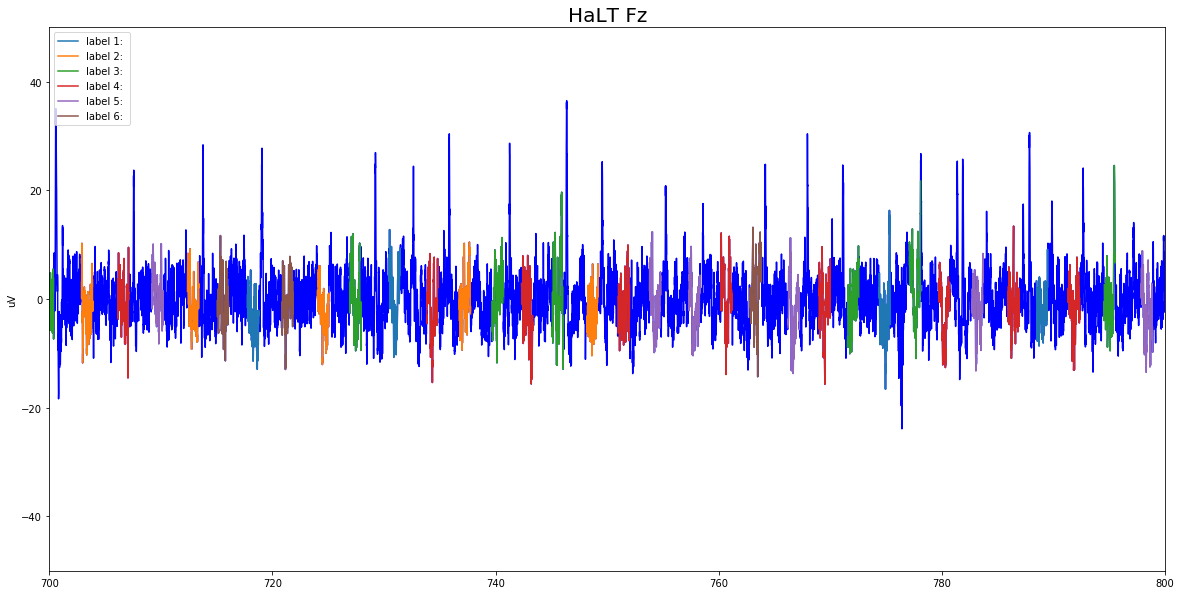

In [9]:
visualizar(df_data_HaLT,'Fz', (700,800), 'HaLT')

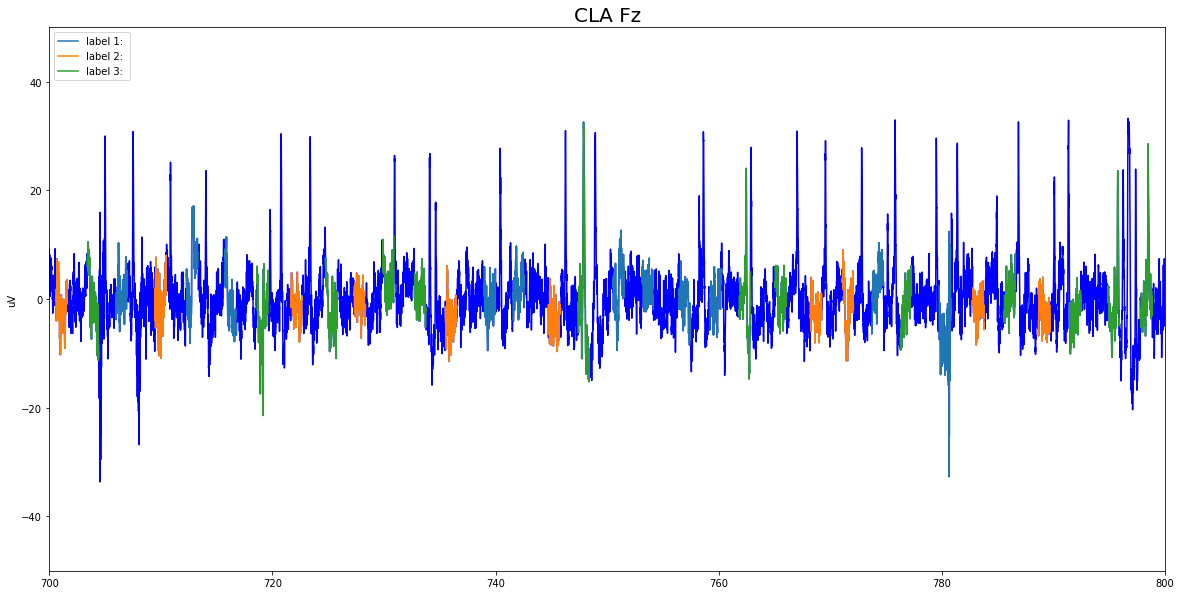

In [10]:
visualizar(df_data_CLA,'Fz', (700,800), 'CLA')

### Extracting Trials

In [11]:
datanp1 = df_data_HaLT.values
datanp2 = df_data_CLA.values
datanp = np.concatenate((datanp1, datanp2), axis=0)
print('Data shape HaLT',datanp1.shape ,'Data shape CLA', datanp2.shape,'Data shape all paradigms',datanp.shape)

Data shape HaLT (667600, 23) Data shape CLA (671600, 23) Data shape all paradigms (1339200, 23)


In [12]:
def get_trials(datanp):
    '''This function extracts the just the trails by eliminating time death '''
    lista_set = []
    lista_labels = []
    lista = []

    for i in range(datanp.shape[0]-1):
        if datanp[i][-1] == 0 and datanp[i+1][-1] == 0:
        #NADA
            continue
        elif datanp[i][-1] == 0 and datanp[i+1][-1] != 0:
            lista.append(datanp[i+1][0:-2])

        elif datanp[i][-1] != 0 and datanp[i+1][-1] != 0:
            lista.append(datanp[i+1][0:-2])

        elif datanp[i][-1] != 0 and datanp[i+1][-1] == 0:
            lista_set.append(np.array(lista))
            lista_labels.append(datanp[i][-1])
            lista = []
    return np.array(lista_set), np.array(lista_labels)

In [13]:
trails_mixed, labels = get_trials(datanp)
trails_mixed.shape

(1927,)

In [14]:
def normalize_shape_trials(trails, labels):
    # get the maximum value of time window in order to normalize the shape for each  trial
    trial_min = 10000000
    for i in range(trails.shape[0]):
        if trails[i].shape[0]<trial_min:
            trial_min = trails[i].shape[0]
    #get the dimensions to storage the data normalized shape
    dim0 = len(labels)
    print(len(labels))
    dim2 =  trails[0].shape[1]
    data = np.zeros((dim0, trial_min,dim2), np.float32)
    # storage the trials all of them with the same shape
    for i in range(trails.shape[0]):
        dim = trails[i].shape[0]
        data[i,:dim, :] = trails[i][:trial_min,:]
    return data

In [15]:
data_A1 = normalize_shape_trials(trails_mixed, labels)
data_A1.shape

1927


(1927, 202, 21)

In [16]:
def file_patient(patientID, data):
    current_directory = os.getcwd()
    try:
      if not os.path.exists(os.path.join(current_directory,'data',patientID)):
        #os.mkdir(os.path.join(current_directory,'data'))
        for folder in range(1,7):
            pp = os.path.join(os.path.join(current_directory,'data',patientID),str(folder))
            os.makedirs(pp)
      else:
        raise IOError('Overwriting trials...')
    except:
      cont1=0
      cont2=0
      cont3=0
      cont4=0
      cont5=0
      cont6=0
      print('saved at ..', current_directory+'\data')
      path = os.path.join(current_directory,'Data',patientID)           
      for i in range(data.shape[0]):
          if labels[i]==1:
              dir_path ='./data/'+patientID+'/1/trial{}.dat'.format(cont1)
              data[i].tofile(dir_path)
              cont1 += 1
          elif labels[i]==2:
              dir_path ='./data/'+patientID+'/2/trial{}.dat'.format(cont2)
              data[i].tofile(dir_path)
              cont2 += 1
          if labels[i]==3:
              dir_path ='./data/'+patientID+'/3/trial{}.dat'.format(cont3)
              data[i].tofile(dir_path)
              cont3 += 1
          if labels[i]==4:
              dir_path ='./data/'+patientID+'/4/trial{}.dat'.format(cont4)
              data[i].tofile(dir_path)
              cont4 += 1
          if labels[i]==5:
              dir_path ='./data/'+patientID+'/5/trial{}.dat'.format(cont5)
              data[i].tofile(dir_path)
              cont5 += 1
          if labels[i]==6:
              dir_path ='./data/'+patientID+'/6/trial{}.dat'.format(cont6)
              data[i].tofile(dir_path)
              cont6 += 1

In [18]:
file_patient('A1', data_A1)

saved at .. C:\Users\GABRIELA\Documents\Ai2BCI\miProyecto\data


## Referencias:

    [1] F. Lotte, L. Bougrain, A. Cichocki, M. Clerc, M. Congedo, A. Rakotomamonjy, and F. Yger, “A review of classification algorithms for EEGbased brain-computer interfaces: a 10 year update.,” Journal of neural engineering, vol. 15, no. 3, p. 031005, 2018.
    
    [2] H. Cho, M. Ahn, M. Kwon, and S. C. Jun, “A step-by-step tutorial for a motor imagery–based BCI,” in Brain–Computer Interfaces Handbook, pp. 445–460, CRC Press, Jan. 2018.

    [3]Nawrocka, Agata, and Karolina Holewa. “Brain - Computer Interface Based on Steady - State Visual Evoked Potentials (SSVEP).” Proceedings of the 14th International Carpathian Control Conference (ICCC), 2013, doi:10.1109/carpathiancc.2013.6560548.
    
    [4]Sharma, Geeta, et al. “A Detailed Study of EEG Based Brain Computer Interface.” Proceedings of the First International Conference on Information Technology and Knowledge Management, 2018, doi:10.15439/2017km47.
    
    [5] Kaya, Murat, et al. “A Large Electroencephalographic Motor Imagery Dataset for Electroencephalographic Brain Computer Interfaces.” Scientific Data, vol. 5, no. 1, 2018, doi:10.1038/sdata.2018.211.
    
    [6] Schirrmeister, Robin Tibor, et al. “Deep Learning with Convolutional Neural Networks for EEG Decoding and Visualization.” Human Brain Mapping, vol. 38, no. 11, July 2017, pp. 5391–5420., doi:10.1002/hbm.23730.
    
    [7] Vinyals, Oriol, et al. “Matching Networks for One Shot Learning.” ArXiv, 29 Dec. 2017, doi:arXiv:1606.04080v2 .